# Analysis of stock prices in different time periods

**NOTE:** `base date point` will be set separatly for each period.

Example: if we want to get daily prices within a week then each Monday will be set as `base date point`

In [1]:
import sys

sys.path.append('..')

from analysis import Column
from common import plot, YahooRange

from loguru import logger
import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

FILENAME = "sp500/sp500.csv"
LIMIT = None

logger.remove()
logger.add(sys.stdout, level="INFO")

pass

## Monthly stock price fluctuations within a year

In [2]:
from analysis import get_best_month

df = get_best_month(FILENAME, YahooRange.YEARS_10, limit=LIMIT)
df

,year,month,Symbol,Percent (mean)
0,2011,1,MHK,100.0
1,2011,2,MHK,97.123051
2,2011,3,MHK,101.039859
3,2011,4,MHK,107.036391
4,2011,5,MHK,104.592717
...,...,...,...,...
57451,2020,8,EXPD,107.288216
57452,2020,9,EXPD,112.872036
57453,2020,10,EXPD,115.899262
57454,2020,11,EXPD,114.080386


       Percent (mean)
month                
1               100.0
2          270.803607
3          274.391687
4           274.97437
5          275.651566


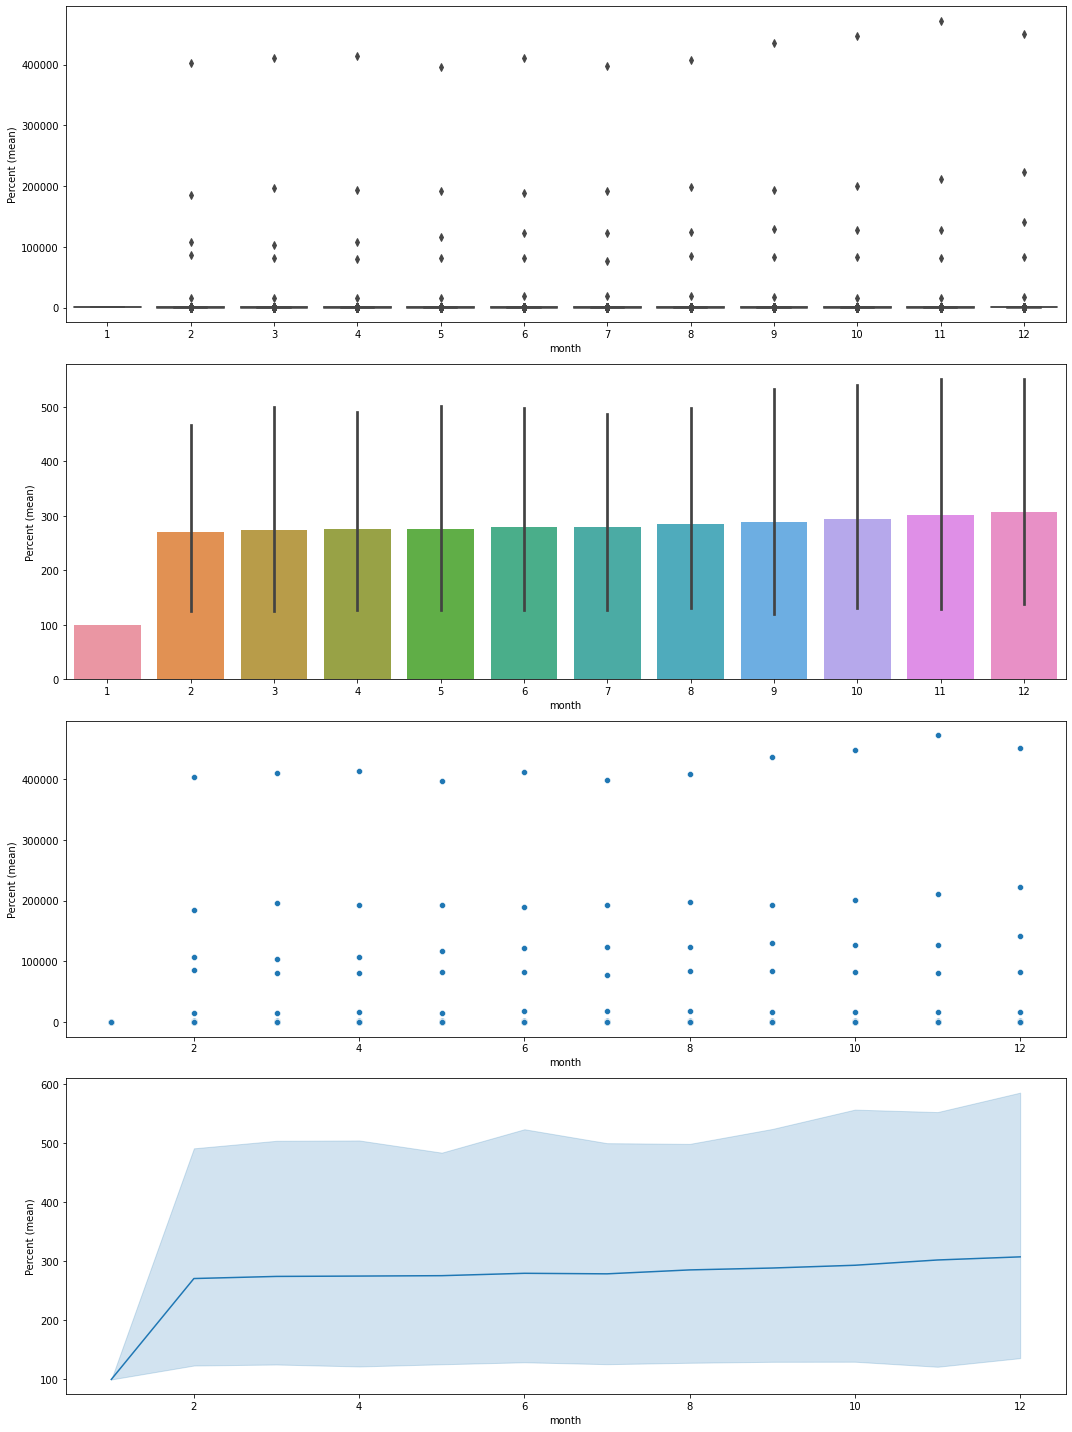

In [3]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Weekly stock price fluctuations within a year

In [4]:
from analysis import get_best_week

df = get_best_week(FILENAME, YahooRange.YEARS_10, limit=LIMIT)

df

,year,week,Symbol,Percent (mean)
0,2015,2,PAYC,100.0
1,2015,3,PAYC,95.761078
2,2015,4,PAYC,90.558764
3,2015,5,PAYC,104.894021
4,2015,6,PAYC,100.462424
...,...,...,...,...
249504,2020,49,NRG,85.631884
249505,2020,50,NRG,90.508655
249506,2020,51,NRG,88.148924
249507,2020,52,NRG,87.30991


      Percent (mean)
week                
1         135.431788
2         194.639916
3         106.422592
4         198.492734
5         197.438821


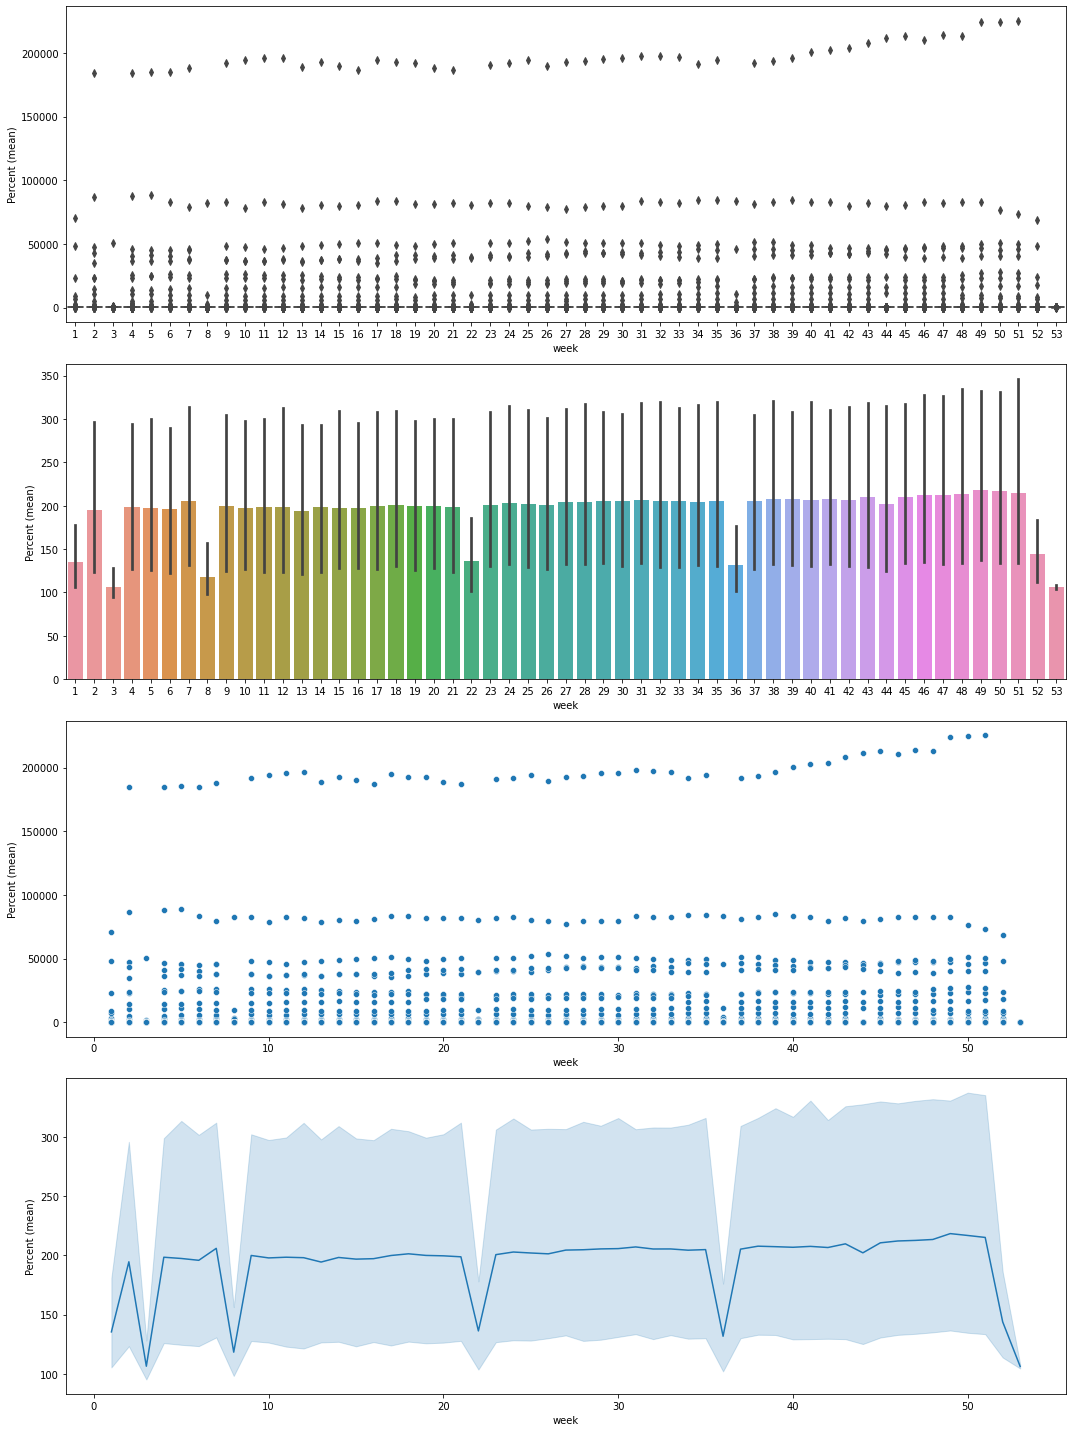

In [5]:
plot(x=Column.WEEK, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a month

In [6]:
from analysis import Column,get_best_month_day

df = get_best_month_day(FILENAME, YahooRange.YEARS_10, limit=LIMIT)

df

,year,month,day,Symbol,Percent (mean)
0,2011,12,1,EA,100.0
1,2011,12,2,EA,102.07792
2,2011,12,5,EA,101.298698
3,2011,12,6,EA,98.917749
4,2011,12,7,EA,99.65368
...,...,...,...,...,...
1209969,2020,11,23,NUE,109.771652
1209970,2020,11,24,NUE,111.890555
1209971,2020,11,25,NUE,114.420897
1209972,2020,11,27,NUE,113.063152


     Percent (mean)
day                
1             100.0
2         99.824726
3        100.065176
4        100.007597
5        100.241899


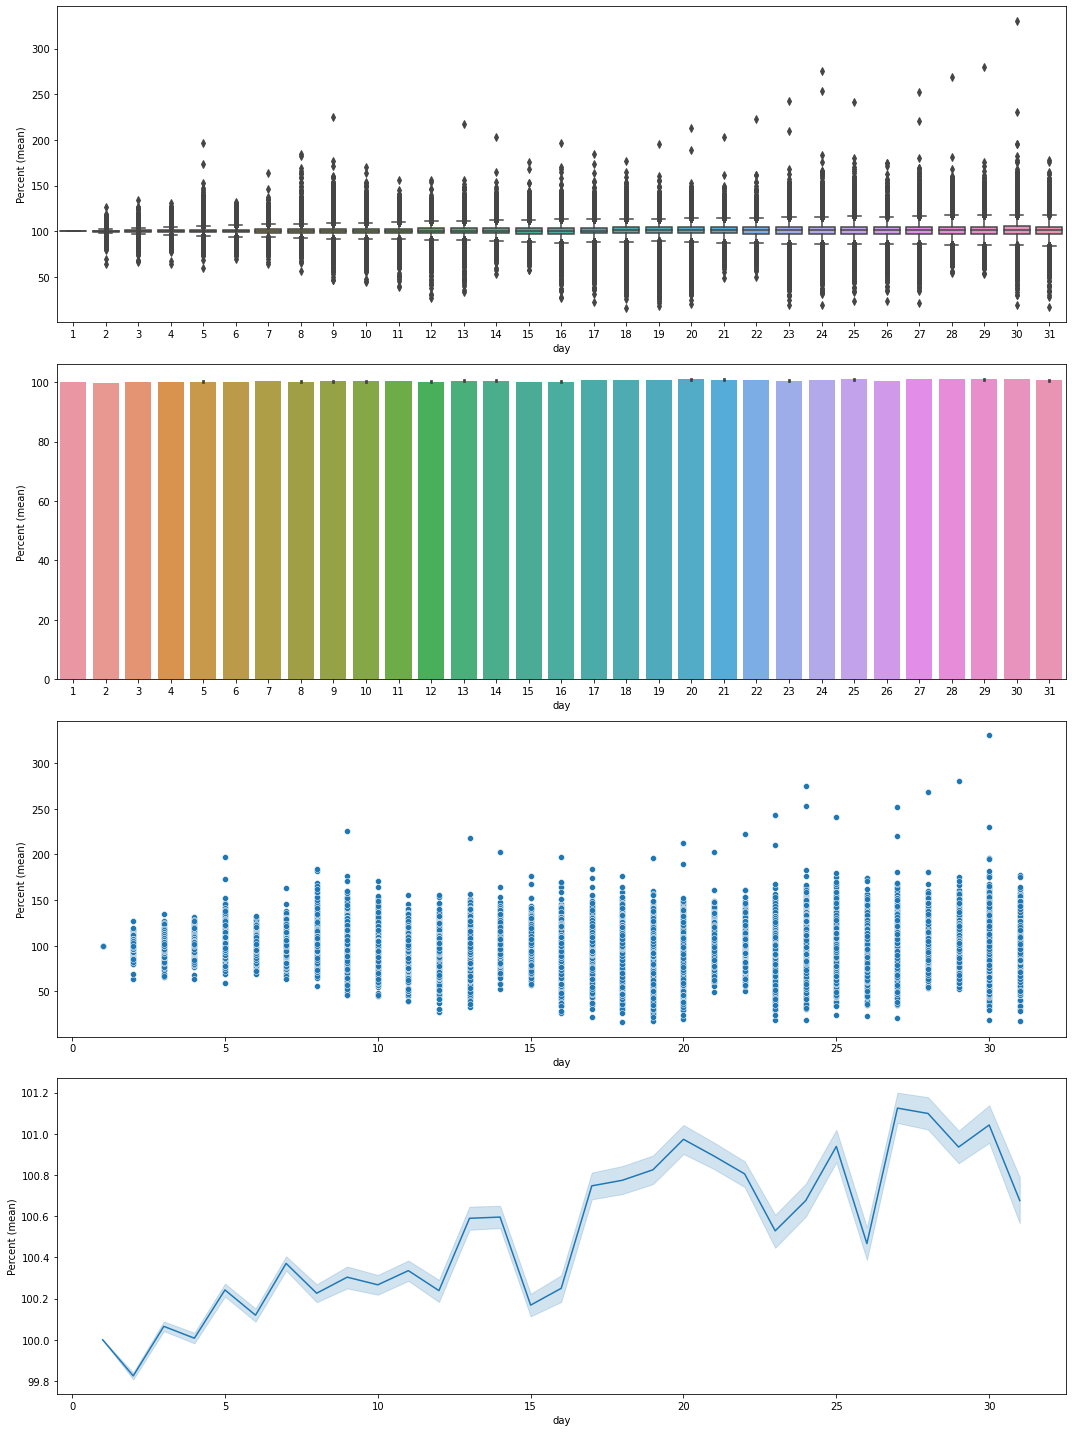

In [7]:
plot(x=Column.DAY, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a week

In [8]:
from analysis import get_best_weekday


df = get_best_weekday(FILENAME, YahooRange.YEARS_10, limit=LIMIT)

df

,year,week,weekday,Symbol,Percent (mean)
0,2011,52,1,EA,100.0
1,2011,52,2,EA,101.05719
2,2011,52,3,EA,98.942819
3,2011,52,4,EA,100.19222
4,2011,1,0,EA,100.0
...,...,...,...,...,...
1208795,2020,51,4,NUE,96.704447
1208796,2020,53,0,NUE,100.0
1208797,2020,53,1,NUE,99.258556
1208798,2020,53,2,NUE,98.498104


         Percent (mean)
weekday                
0                 100.0
1            100.091575
2            100.086351
3            100.035453
4            100.123565


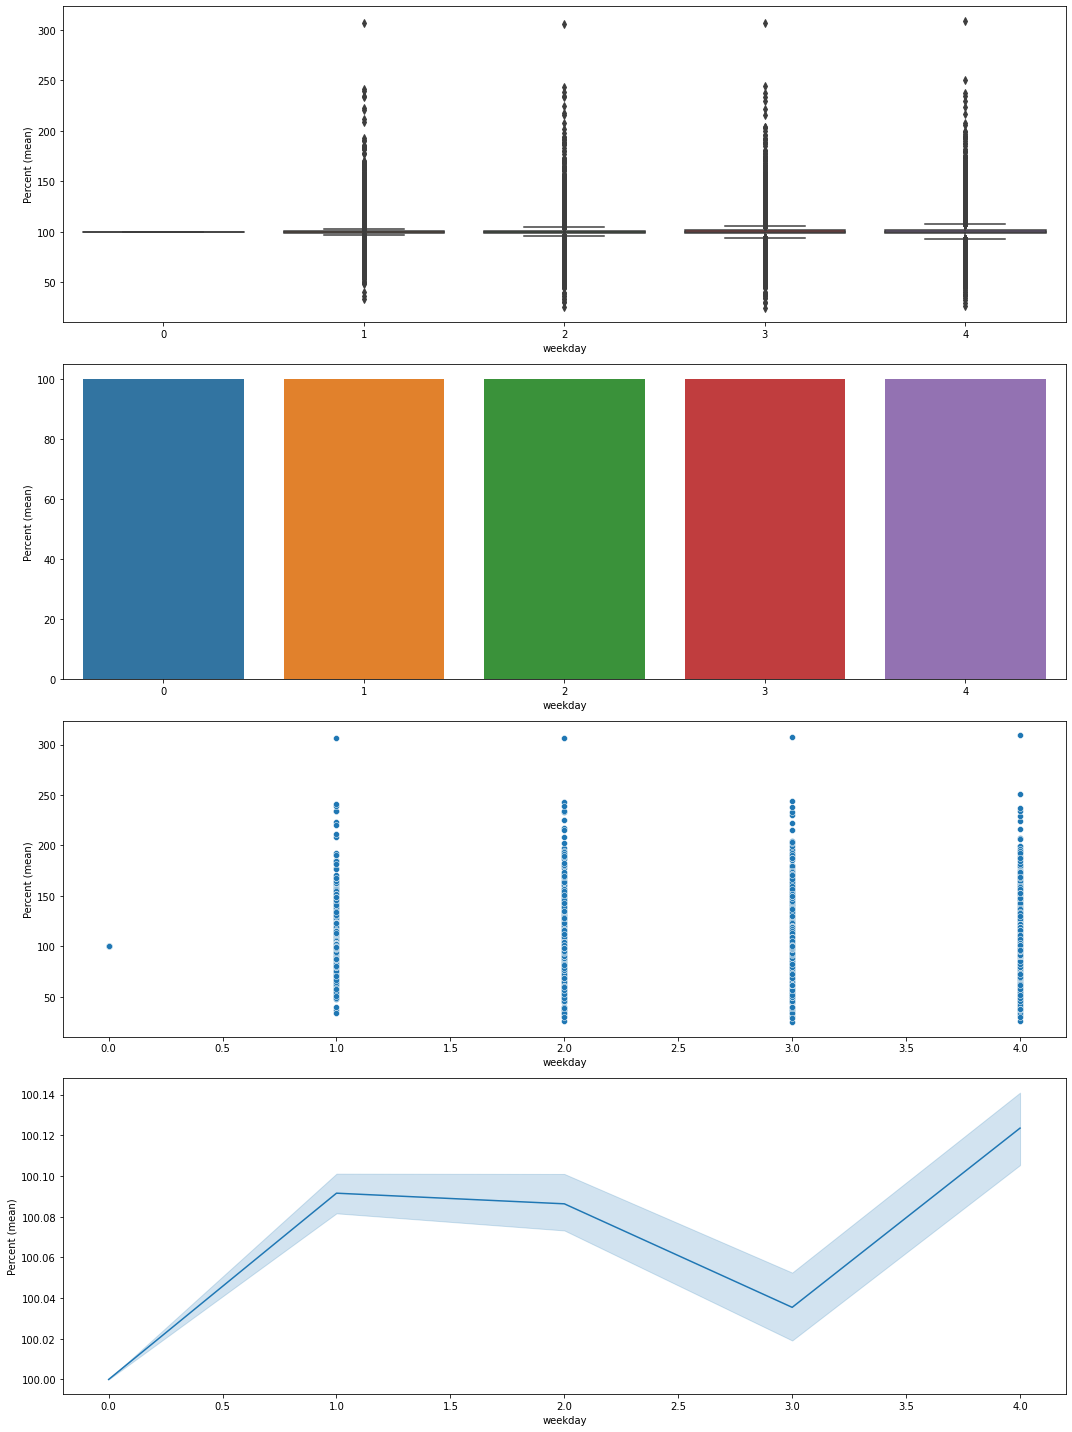

In [9]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df)

## Hourly stock price fluctuations with a day

In [10]:
from analysis import get_best_hour

df = get_best_hour(FILENAME, YahooRange.YEARS_2, limit=LIMIT)

df

,year,week,day,hour,Symbol,Percent (mean)
0,2020,14,3,9,OTIS,100.0
1,2020,14,3,10,OTIS,99.065634
2,2020,14,3,11,OTIS,104.238834
3,2020,14,3,12,OTIS,106.494983
4,2020,14,3,13,OTIS,111.109845
...,...,...,...,...,...,...
5363,2020,53,31,11,CARR,99.308883
5364,2020,53,31,12,CARR,99.016483
5365,2020,53,31,13,CARR,99.33546
5366,2020,53,31,14,CARR,99.33546


      Percent (mean)
hour                
9              100.0
10         100.28387
11        100.250948
12        100.281567
13        100.290068


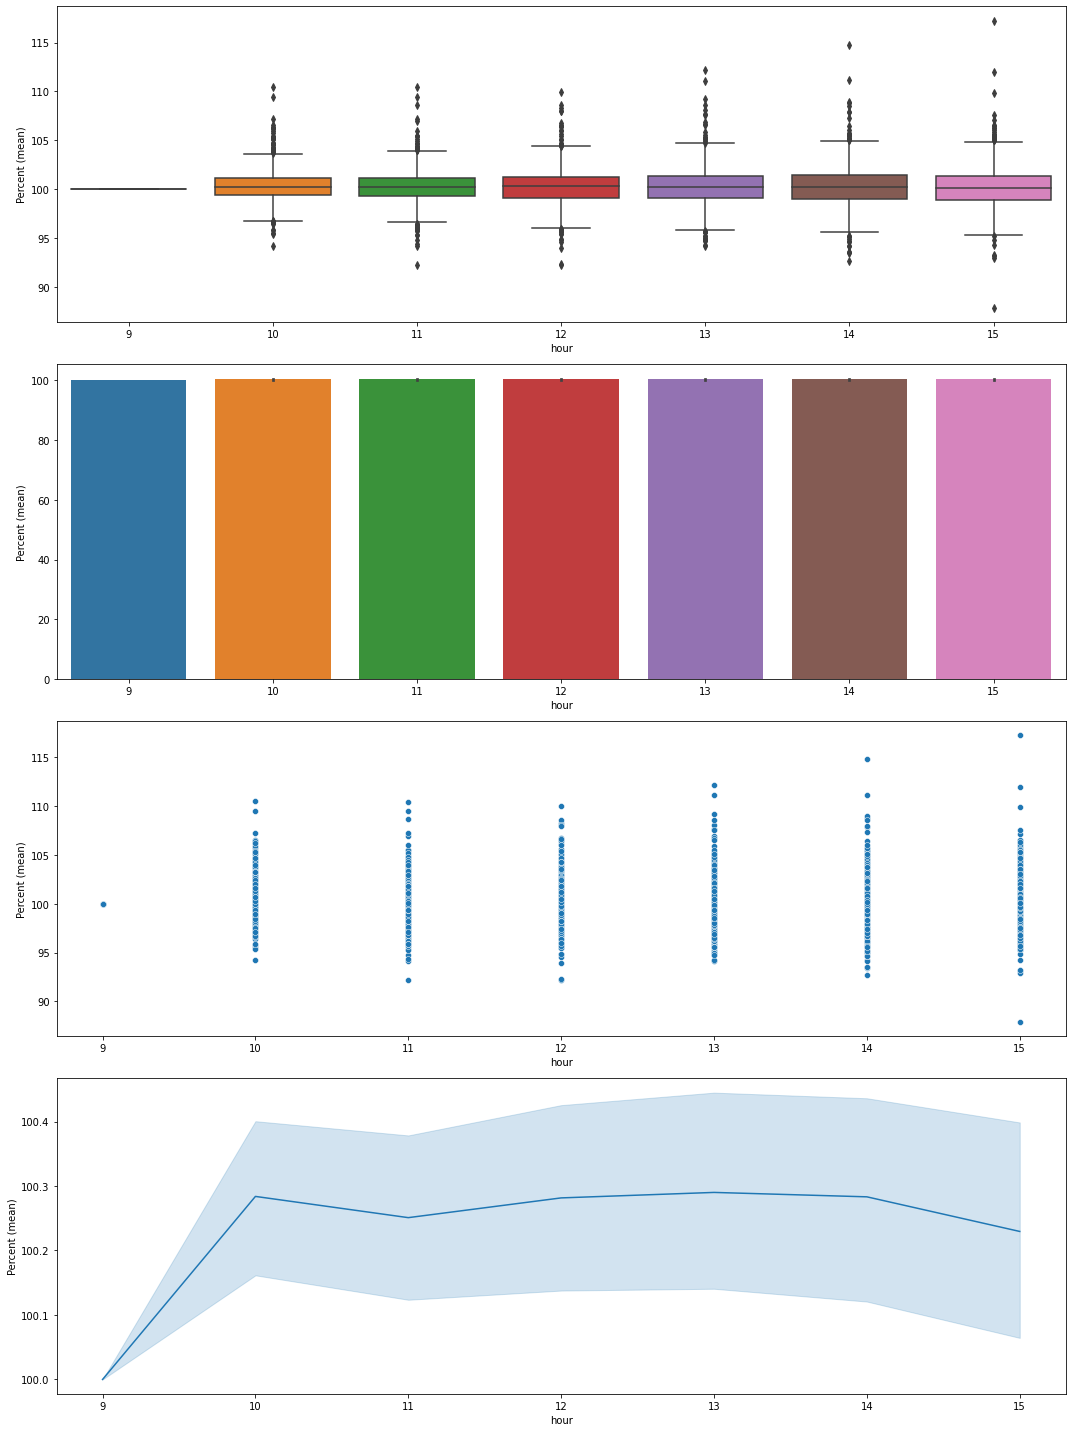

In [11]:
plot(x=Column.HOUR, y=Column.PERCENT, data=df)

## Hourly and quarterly stock price fluctuations within a day

In [12]:
from analysis import get_best_time

df = get_best_time(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

,year,week,day,hour,minute,time,Symbol,Percent (mean)
0,2021,11,17,9,30,9.5,GPN,100.0
1,2021,11,17,9,45,9.75,GPN,100.050962
2,2021,11,17,10,0,10.0,GPN,99.902694
3,2021,11,17,10,15,10.25,GPN,99.888794
4,2021,11,17,10,30,10.5,GPN,99.990731
...,...,...,...,...,...,...,...,...
511660,2021,19,11,14,45,14.75,RHI,99.488606
511661,2021,19,11,15,0,15.0,RHI,99.577546
511662,2021,19,11,15,15,15.25,RHI,99.466375
511663,2021,19,11,15,30,15.5,RHI,99.822128


       Percent (mean)
time                 
9.50            100.0
9.75       100.013161
10.00      100.019854
10.25      100.014358
10.50      100.012946


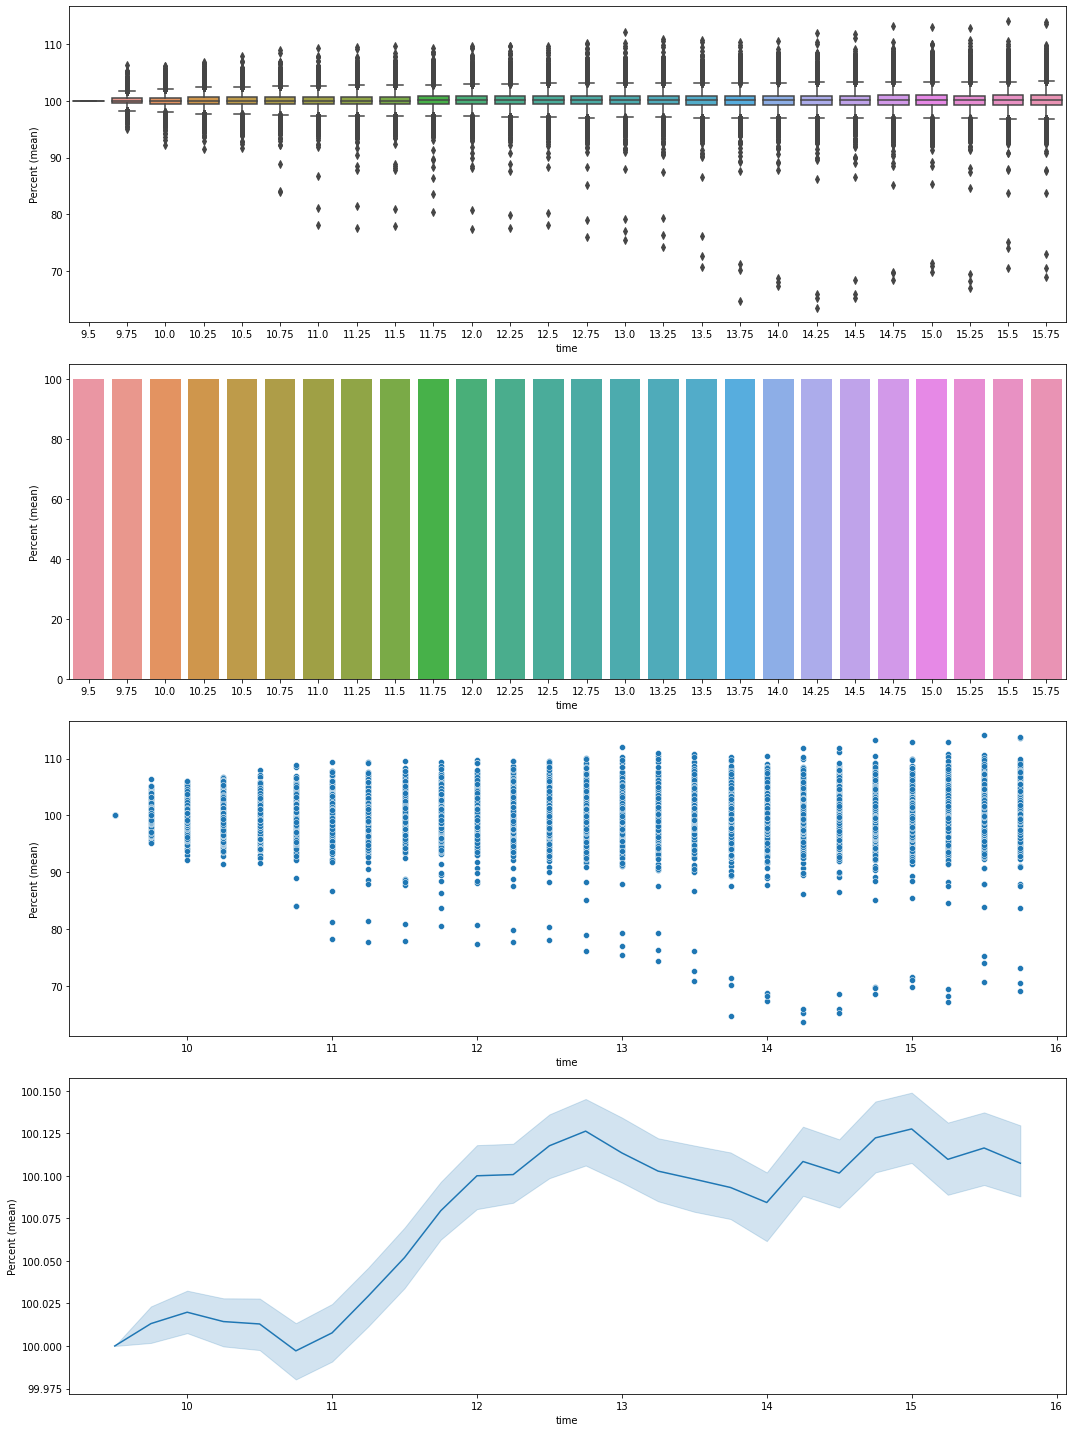

In [13]:
plot(x=Column.TIME, y=Column.PERCENT, data=df)

## Quarterly stock price fluctuations within an hour

In [14]:
from analysis import get_best_quarter

df = get_best_quarter(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

,year,week,day,hour,minute,quarter,Symbol,Percent (mean)
0,2021,11,17,9,30,30,GPN,100.0
1,2021,11,17,9,45,45,GPN,100.050962
2,2021,11,17,10,0,0,GPN,100.0
3,2021,11,17,10,15,15,GPN,99.986087
4,2021,11,17,10,30,30,GPN,100.088123
...,...,...,...,...,...,...,...,...
511266,2021,19,11,14,45,45,RHI,99.92184
511267,2021,19,11,15,0,0,RHI,100.0
511268,2021,19,11,15,15,15,RHI,99.888357
511269,2021,19,11,15,30,30,RHI,100.245619


         Percent (mean)
quarter                
0                 100.0
15           100.001017
30           100.005404
45           100.011317


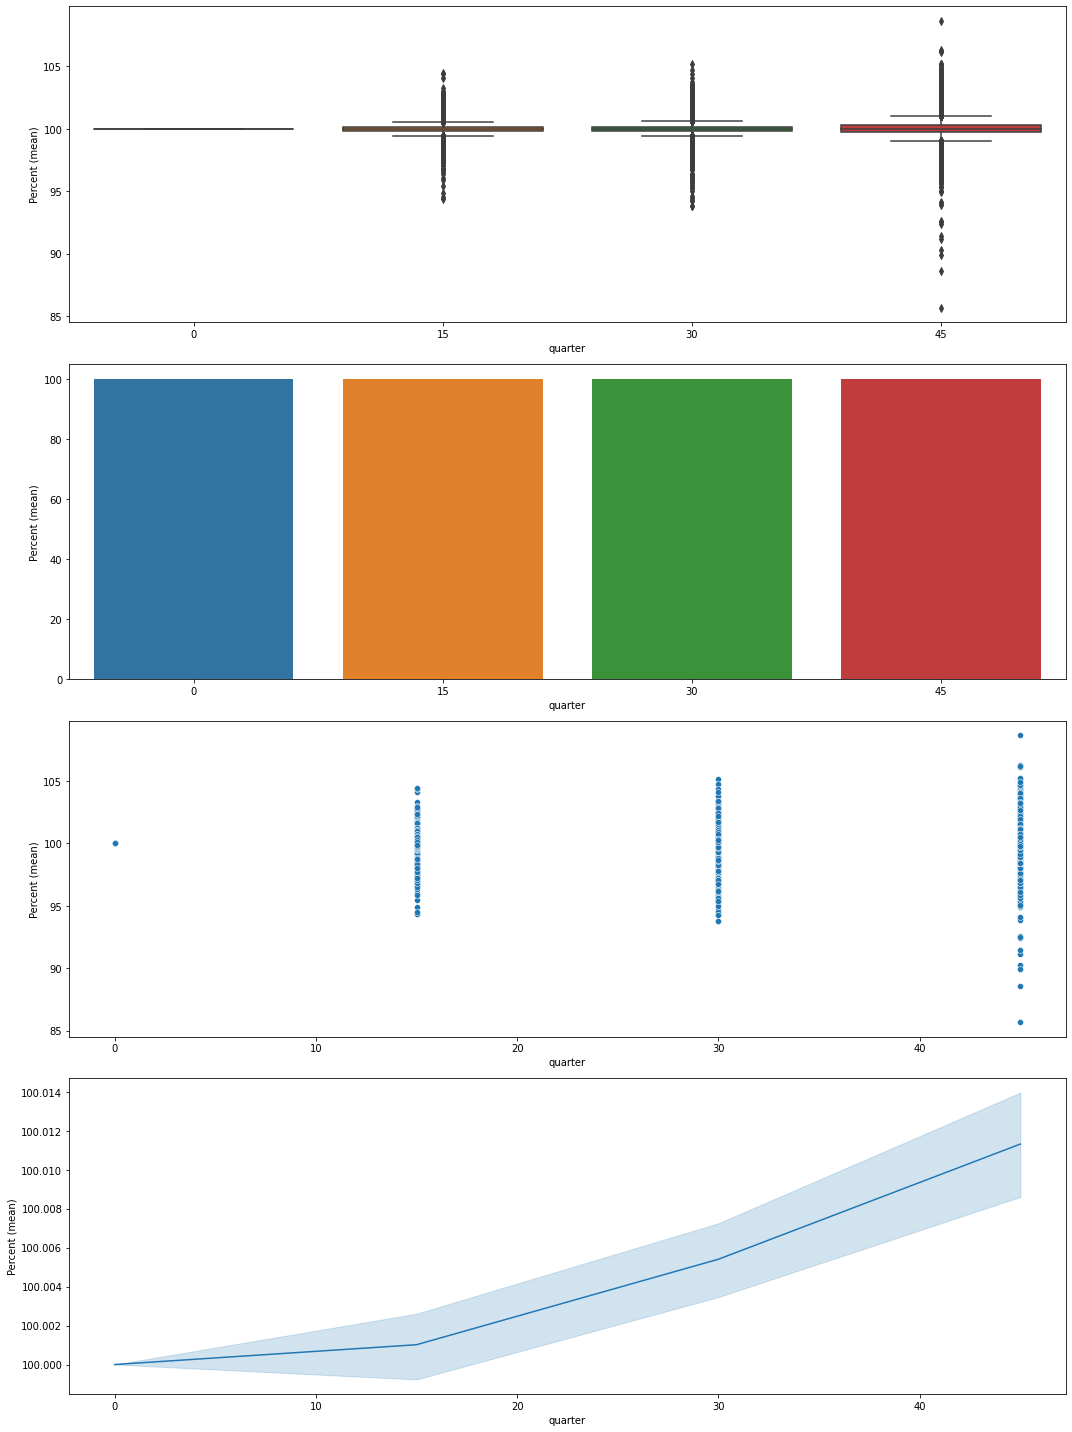

In [15]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df)